# Amazon's  Bestselling Book Visualization

Amazon.com, Inc, is an American multinational technology company based in Seattle, Washington, which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is considered one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook.The company has been referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable brand." https://en.wikipedia.org/wiki/Amazon_(company)

About the dataset.

The dataset is on Amazon's Top bestselling books from 2009 to 2019. It Contains 550 books,the data has been categorized into fiction and non-fiction.

Task

The task is to visualize the following categories; 
1. The best selling books of the decade.
2. The percentage of fiction to non-fiction.
3. Trends over the years.
4. Top 10 Authors according to reviews.
using matplotlib or seaborn

Features of the dataset

Name: Name of the Book. String,
Author: The author of the Book. String,
User Rating: Amazon User Rating. Float,
Reviews: Number of written reviews on amazon. Float,
Price: The price of the book (As at 13/10/2020). Float,
Year: The Year(s) it ranked on the bestseller. Date,
Genre: Whether fiction or non-fiction. String

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
#read data using pandas
data = pd.read_csv('bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# General Data Exploration

In [4]:
#check the shape of the dataset
data.shape

(550, 7)

In [5]:
#statisic description of the dataset
data.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


In [6]:
#general info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# The best selling books of the decade.

In [7]:
#catergorising group by function 
best_selling=data[['Name', 'Year']]
Best_Selling= best_selling.groupby(['Name'],as_index=False).count()
Best_Selling=Best_Selling.sort_values(['Year'], ascending=False)
Best_Selling.head(7)

,Name,Year
191,Publication Manual of the American Psychologic...,10
209,StrengthsFinder 2.0,9
178,"Oh, the Places You'll Go!",8
310,The Very Hungry Caterpillar,7
219,The 7 Habits of Highly Effective People: Power...,7
243,The Four Agreements: A Practical Guide to Pers...,6
140,Jesus Calling: Enjoying Peace in His Presence ...,6


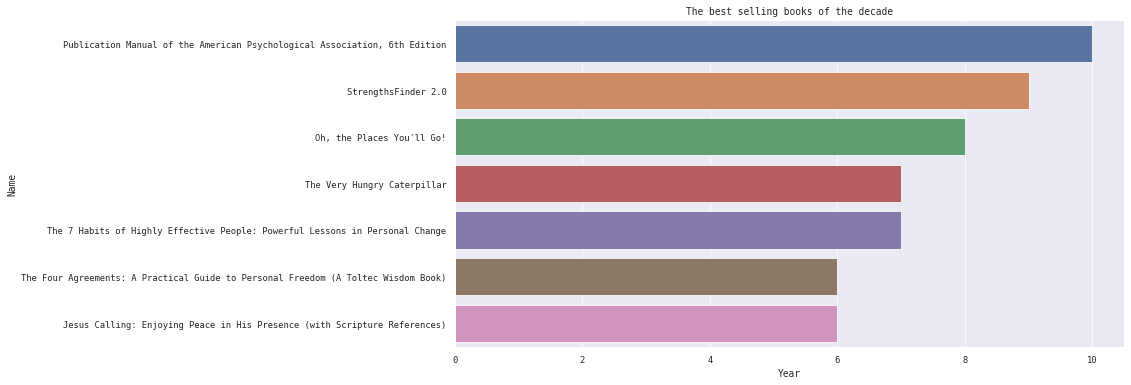

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Year', y='Name', data=Best_Selling.head(7), ax=ax)
plt.title('The best selling books of the decade')
plt.show()

The best selling books of the decade with frequency between 60% - 100% includes;
1. Publication Manual of the American Psychological Association, 6th Edition
2. StrengthsFinder 2.0
3. Oh, the Places You'll Go!
4. The Very Hungry Caterpilla
5. The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change
6. The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)
7. Jesus Calling: Enjoying Peace in His Presence(with Scripture References)

# The percentage of fiction to non-fiction

In [9]:
data['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

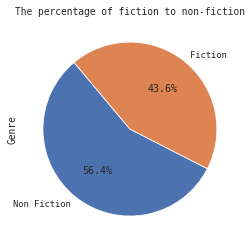

In [10]:
data['Genre'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=130, title='The percentage of fiction to non-fiction')

Non fiction got a larger percentage given the analysis above.

# Trends over the Years

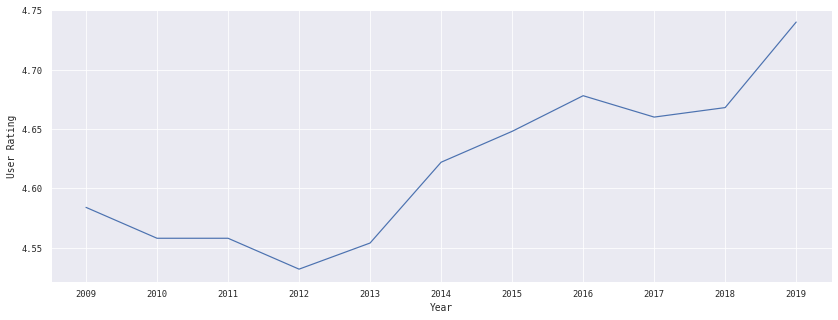

In [12]:
#plotting a line chart to check the trend using year and the user rating
fig, ax = plt.subplots(figsize=(14,5))

rating = data.groupby('Year')['User Rating'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='User Rating', data=data, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)

plt.show()

From the chart above, the user rating distribution per year soar high from the year 2014 to 2019

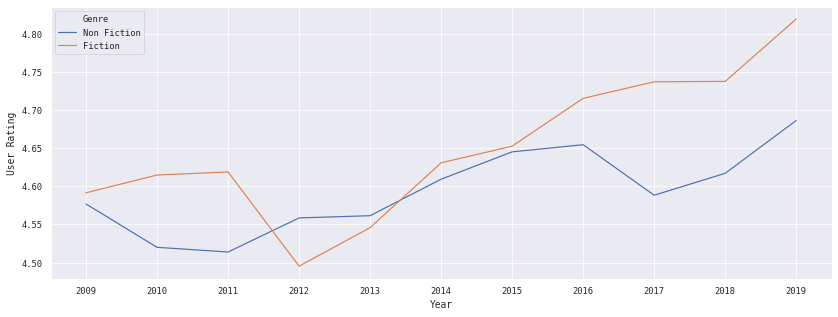

In [13]:
#plotting a line chart to check the trend using year, the user rating  and Genre
fig, ax = plt.subplots(figsize=(14,5))

rating = data.groupby('Year')['User Rating'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='User Rating', hue='Genre', data=data, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)
plt.show()

The chart above depicts a glaring difference of the rating trend of fiction and non fiction

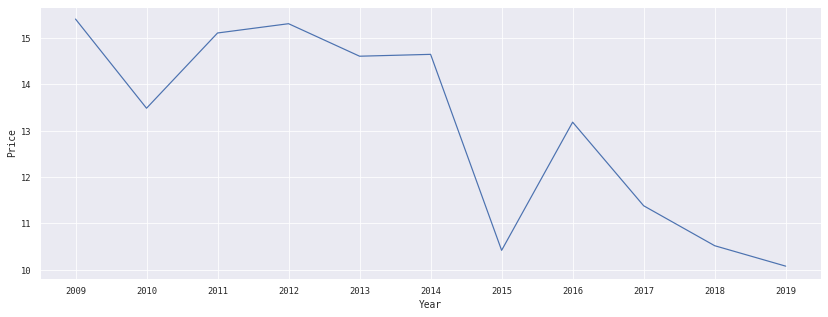

In [14]:
#plotting a line chart to check the trend using year and the average price of the books per year
fig, ax = plt.subplots(figsize=(14,5))

rating = data.groupby('Year')['Price'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='Price', data=data, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)
plt.show()

# Top 10 Authors according to reviews.

In [15]:
author=data[['Author','Reviews']]
Author= author.groupby(['Author'],as_index=False).mean()
Author=Author.sort_values(['Reviews',], ascending=False)
Author.head(10)

,Author,Reviews
68,Delia Owens,87841.0
180,Paula Hawkins,79446.0
168,Michelle Obama,61133.0
100,Gillian Flynn,57271.0
142,Kristin Hannah,49288.0
128,John Green,42083.8
15,Andy Weir,39459.0
21,Anthony Doerr,36348.0
182,Paulo Coelho,35799.0
71,Donna Tartt,33844.0


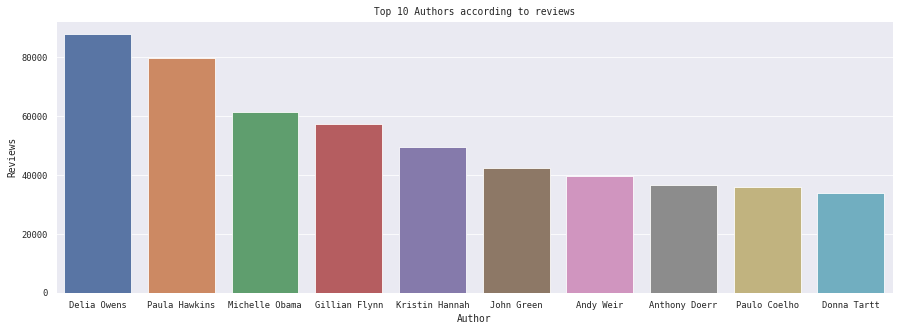

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='Author', y='Reviews', data=Author.head(10), ax=ax)
plt.title('Top 10 Authors according to reviews')
plt.show()

Top 10 Authors according to reviews includes;
1. Delia Owens 
2. Paula Hawkins 
3. Michellle Obama
4. Gillian Flynn
5. Kristin Hannah
6. John Green
7. Andy Weir
8. Anthony Doerr	
9. Paulo Coelho
10. Donna Tartt
